[View in Colaboratory](https://colab.research.google.com/github/HUSTneeb/GoogleColabCode/blob/master/TensorFlowLearn1.ipynb)

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

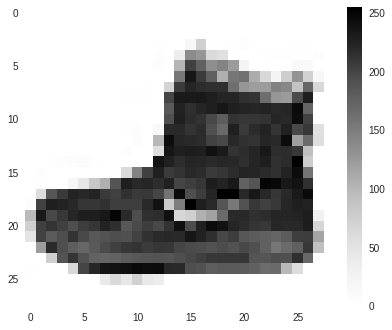

In [7]:
plt.figure();
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


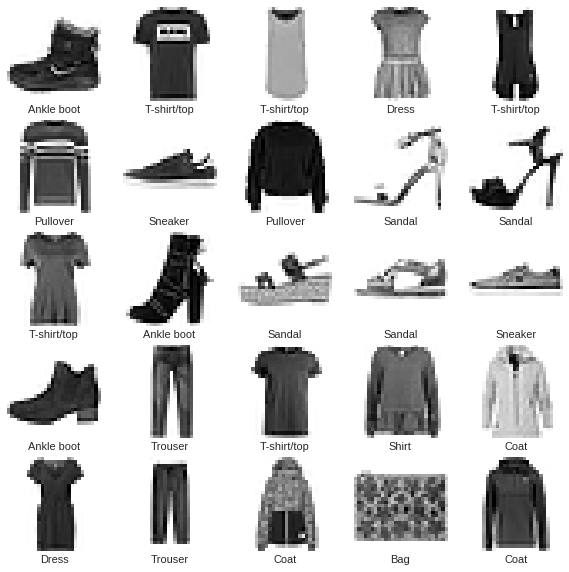

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.4969 - acc: 0.8264
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3733 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3374 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3139 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2952 - acc: 0.8905


In [14]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

10000/10000 [==============================] - 0s 31us/step
Test accuracy: 0.8736


In [0]:
predictions=model.predict(test_images)

In [16]:
predictions[0]

array([3.4214049e-06, 5.8767533e-09, 6.9222260e-08, 3.7376435e-09,
       4.5655227e-08, 1.6736733e-02, 7.2972330e-07, 3.4102798e-02,
       8.1381673e-05, 9.4907486e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'
    
  plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),
            color=color)
  
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label=predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

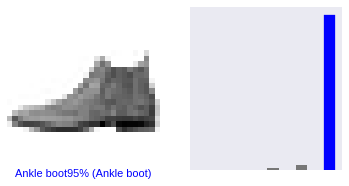

In [21]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

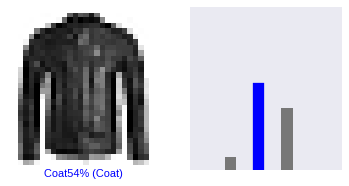

In [26]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


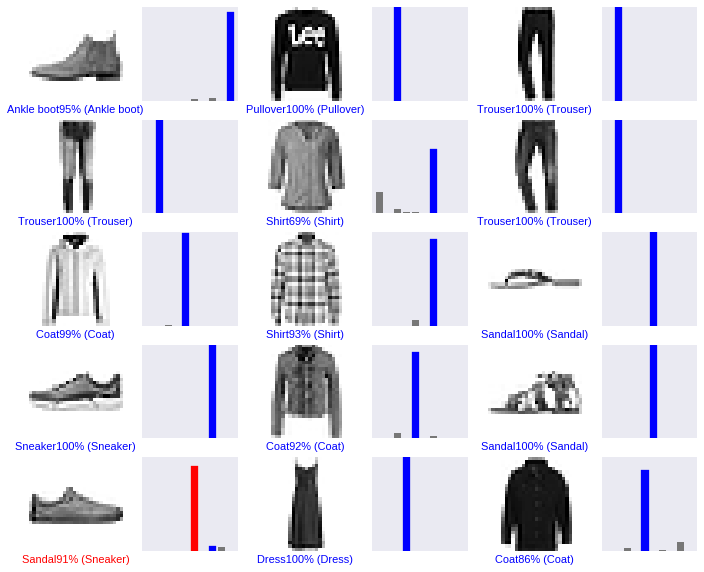

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
